### Assignment

- Use the data provided in data and loan details sheet and join them
- Create beatiful charts for some of the below items where applicable
- Distribution of loan count & amout vs profession
- Distribution of loan amout  & amount vs loan product
- Find out customers who have no loans
- Find out customers with max number of loans
- Find out top 10 customer by amount
- Find out the distribution of DPD (Days past due date) across the loans
- Aggregate the data by customer and find out - Whats the total amout owed, what is the last due date that has not been paid - what is the avg due date


In [1]:
#importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading data
df1 = pd.read_excel('loan.xlsx', sheet_name='customers')
df2 = pd.read_excel('loan.xlsx', sheet_name='loan details')

In [3]:
## Reading data
df1.head()

,customer_id,firstname,lastname,email,profession
0,100.0,Tomasina,Marcellus,Tomasina.Marcellus@yopmail.com,police officer
1,101.0,Alex,Rodmann,Alex.Rodmann@yopmail.com,developer
2,102.0,Diena,Manolo,Diena.Manolo@yopmail.com,firefighter
3,103.0,Cristine,Yuille,Cristine.Yuille@yopmail.com,firefighter
4,104.0,Dania,Auberbach,Dania.Auberbach@yopmail.com,doctor


In [4]:
df2.head()

,loan_number,loan_product,amount_pending,due_date,customer_id
0,100.0,NaN,374.69,2020-12-19,440.0
1,101.0,bnpl,688.80,2021-02-14,555.0
2,102.0,vehicle loan,928.87,2021-03-19,250.0
3,103.0,personal loan,433.99,2020-09-07,180.0
4,104.0,vehicle loan,157.55,2020-10-01,597.0


#### Use the data provided in data and loan details sheet and join them

In [5]:
## Combining data
df = df1.merge(df2, how='left', left_on='customer_id', right_on='loan_number')

In [6]:
df.head()

,customer_id_x,firstname,lastname,email,profession,loan_number,loan_product,amount_pending,due_date,customer_id_y
0,100.0,Tomasina,Marcellus,Tomasina.Marcellus@yopmail.com,police officer,100.0,NaN,374.69,2020-12-19,440.0
1,101.0,Alex,Rodmann,Alex.Rodmann@yopmail.com,developer,101.0,bnpl,688.80,2021-02-14,555.0
2,102.0,Diena,Manolo,Diena.Manolo@yopmail.com,firefighter,102.0,vehicle loan,928.87,2021-03-19,250.0
3,103.0,Cristine,Yuille,Cristine.Yuille@yopmail.com,firefighter,103.0,personal loan,433.99,2020-09-07,180.0
4,104.0,Dania,Auberbach,Dania.Auberbach@yopmail.com,doctor,104.0,vehicle loan,157.55,2020-10-01,597.0


#### Create beatiful charts for some of the below items where applicable

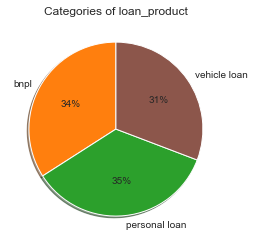

In [7]:
import matplotlib.pyplot as plt
## Pie Chart visualization to understand the Adaptivity level of students
cmap = plt.get_cmap("tab10")
sns.set_style("darkgrid")
colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
X= df.groupby(['loan_product'])['loan_product'].count().to_frame()
plt.pie(X['loan_product'],colors= colors,labels = X.index,startangle = 90, autopct = "%1.0f%%", explode = None, shadow = True)
plt.title("Categories of loan_product")
plt.show()

### Distribution of loan count & amout vs profession

C:\Users\uttreshwarg\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

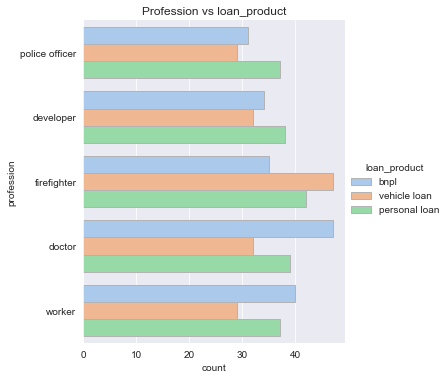

In [8]:
import seaborn as sns
plt.figure(figsize =(10, 10))
sns.set_style("darkgrid")
sns.factorplot(y="profession", hue="loan_product", kind="count",
            palette="pastel", edgecolor=".7",
            data=df)
plt.title('Profession vs loan_product')
plt.show()

### Distribution of loan amout & amount vs loan product

Text(0.5, 1.0, '')

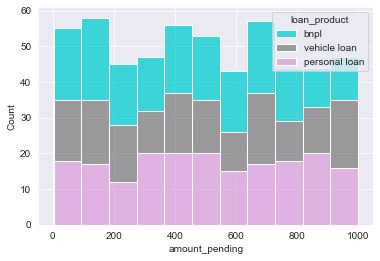

In [9]:
plt.figure(figsize =(6, 4))
sns.set_style("darkgrid")
sns.histplot(data=df, x="amount_pending", hue="loan_product", multiple="stack", palette=['DarkTurquoise', 'grey','Plum'])
plt.title("")

<AxesSubplot:xlabel='amount_pending', ylabel='Density'>

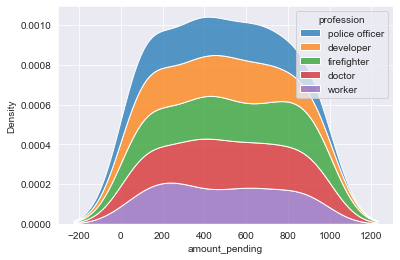

In [10]:
plt.figure(figsize =(6, 4))
sns.set_style("darkgrid")
sns.kdeplot(data=df, x="amount_pending", hue="profession", multiple="stack")

### Find out customers who have no loans

In [11]:
customers_not_having_loan = df[df['amount_pending'] <= 1]
customers_not_having_loan

,customer_id_x,firstname,lastname,email,profession,loan_number,loan_product,amount_pending,due_date,customer_id_y


### Find out customers with max number of loans

In [12]:
customer_having_max_number_of_loan = df.groupby(['firstname'])[['firstname','amount_pending']].size()
customer_having_max_number_of_loan = pd.DataFrame(customer_having_max_number_of_loan, columns=['Count'])

In [13]:
customer_having_max_number_of_loan.head()

,Count
firstname,
Ada,2
Addia,4
Adele,1
Adelle,2
Adore,1


### Find out top 10 customer by amount

In [14]:
df.nlargest(n=10,columns=['amount_pending'])

,customer_id_x,firstname,lastname,email,profession,loan_number,loan_product,amount_pending,due_date,customer_id_y
492,592.0,Wanda,Magdalen,Wanda.Magdalen@yopmail.com,doctor,592.0,NaN,999.25,2020-07-26,215.0
259,359.0,Tina,Lutero,Tina.Lutero@yopmail.com,firefighter,359.0,bnpl,998.63,2021-10-30,127.0
535,635.0,Eadie,Helfand,Eadie.Helfand@yopmail.com,doctor,635.0,NaN,998.08,2020-09-30,422.0
263,363.0,Emma,Abram,Emma.Abram@yopmail.com,firefighter,363.0,personal loan,996.01,2021-12-27,123.0
136,236.0,Malina,Middleton,Malina.Middleton@yopmail.com,doctor,236.0,bnpl,995.04,2021-03-27,268.0
253,353.0,Codie,Deny,Codie.Deny@yopmail.com,firefighter,353.0,vehicle loan,992.73,2021-03-17,198.0
154,254.0,Hyacinthe,Uird,Hyacinthe.Uird@yopmail.com,worker,254.0,bnpl,990.99,2021-02-27,219.0
640,740.0,Livvyy,Calhoun,Livvyy.Calhoun@yopmail.com,police officer,740.0,vehicle loan,990.83,2021-06-30,289.0
149,249.0,Claresta,Mintz,Claresta.Mintz@yopmail.com,developer,249.0,vehicle loan,989.42,2021-01-19,349.0
550,650.0,Kristan,Eachern,Kristan.Eachern@yopmail.com,doctor,650.0,vehicle loan,989.28,2021-09-28,406.0


### Find out the distribution of DPD (Days past due date) across the loans

<AxesSubplot:xlabel='due_date,due_date'>

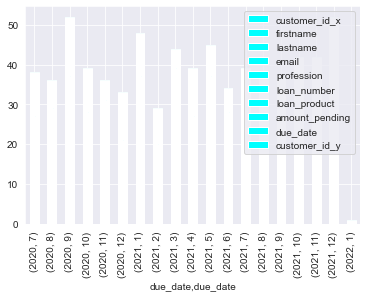

In [23]:
df["due_date"] = df["due_date"].astype("datetime64")
df.groupby([df["due_date"].dt.year, df["due_date"].dt.month]).count().plot(kind="bar",color = 'aqua')


### Aggregate the data by customer and find out - Whats the total amout owed, what is the last due date that has not been paid - what is the avg due date

In [26]:
df.columns

Index(['customer_id_x', 'firstname', 'lastname', 'email', 'profession',
       'loan_number', 'loan_product', 'amount_pending', 'due_date',
       'customer_id_y'],
      dtype='object')

In [34]:
df3 = df.groupby(['firstname','amount_pending','due_date'])[['amount_pending','due_date']].size()

In [43]:
df3 = df.groupby(['firstname','amount_pending','due_date'])[['amount_pending','due_date']].size().reset_index(name='count')

In [46]:
df3.head()

,firstname,amount_pending,due_date,count
0,Ada,53.86,2021-02-09,1
1,Ada,273.61,2021-10-01,1
2,Addia,357.47,2021-10-18,1
3,Addia,771.91,2021-07-16,1
4,Addia,783.68,2020-09-04,1


In [60]:
df4 = df3.groupby(['firstname']).agg(avg_due_date = ('due_date',np.mean))

In [61]:
df4.head()

,avg_due_date
firstname,
Ada,2021-06-06 00:00:00
Addia,2021-03-04 06:00:00
Adele,2020-07-07 00:00:00
Adelle,2020-10-19 12:00:00
Adore,2021-12-21 00:00:00
